In [ ]:
import tensorflow.compat.v2.feature_column as fc
import tensorflow as tf

In [ ]:
tensor1 = tf.Variable(355, tf.int16)
tensor1

<tf.Variable 'Variable:0' shape=() dtype=int32, numpy=355>

In [ ]:
rankt1 = tf.Variable([[1, 1], [2, 2]], tf.int16)
rankt1

<tf.Variable 'Variable:0' shape=(2, 2) dtype=int32, numpy=
array([[1, 1],
       [2, 2]], dtype=int32)>

In [ ]:
rankt1.shape

TensorShape([2, 2])

In [ ]:
tensor2 = tf.ones([1, 2, 3])
tensor2

<tf.Tensor: shape=(1, 2, 3), dtype=float32, numpy=
array([[[1., 1., 1.],
        [1., 1., 1.]]], dtype=float32)>

In [ ]:
tensor3 = tf.reshape(tensor2, [3, -1])
tensor3

<tf.Tensor: shape=(3, 2), dtype=float32, numpy=
array([[1., 1.],
       [1., 1.],
       [1., 1.]], dtype=float32)>

Tensor is like a vector. Shape and reshape done

In [ ]:
!pip install -q sklearn

  Preparing metadata (setup.py) ... done


In [ ]:
from __future__ import absolute_import, division, print_function, unicode_literals

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import clear_output
from six.moves import urllib

DataFrames

In [ ]:
dftrain = pd.read_csv('https://storage.googleapis.com/tf-datasets/titanic/train.csv')
#This is the training dataset

dfeval = pd.read_csv('https://storage.googleapis.com/tf-datasets/titanic/eval.csv')
#This is the testing dataset
dftrain.head()

,survived,sex,age,n_siblings_spouses,parch,fare,class,deck,embark_town,alone
0,0,male,22.0,1,0,7.2500,Third,unknown,Southampton,n
1,1,female,38.0,1,0,71.2833,First,C,Cherbourg,n
2,1,female,26.0,0,0,7.9250,Third,unknown,Southampton,y
3,1,female,35.0,1,0,53.1000,First,C,Southampton,n
4,0,male,28.0,0,0,8.4583,Third,unknown,Queenstown,y


In [ ]:
dfeval.head()

,survived,sex,age,n_siblings_spouses,parch,fare,class,deck,embark_town,alone
0,0,male,35.0,0,0,8.0500,Third,unknown,Southampton,y
1,0,male,54.0,0,0,51.8625,First,E,Southampton,y
2,1,female,58.0,0,0,26.5500,First,C,Southampton,y
3,1,female,55.0,0,0,16.0000,Second,unknown,Southampton,y
4,1,male,34.0,0,0,13.0000,Second,D,Southampton,y


In [ ]:
y_train = dftrain.pop('survived')
y_eval = dfeval.pop('survived')

y_train.head()
y_eval.head()

0    0
1    0
2    1
3    1
4    1
Name: survived, dtype: int64

In [ ]:
dftrain['age'].head()

0    22.0
1    38.0
2    26.0
3    35.0
4    28.0
Name: age, dtype: float64

In [ ]:
print(dftrain.loc[0], y_train.loc[0])

sex                          male
age                          22.0
n_siblings_spouses              1
parch                           0
fare                         7.25
class                       Third
deck                      unknown
embark_town           Southampton
alone                           n
Name: 0, dtype: object 0


In [ ]:
print(dftrain.loc[0])

sex                          male
age                          22.0
n_siblings_spouses              1
parch                           0
fare                         7.25
class                       Third
deck                      unknown
embark_town           Southampton
alone                           n
Name: 0, dtype: object


In [ ]:
dftrain.describe()

,age,n_siblings_spouses,parch,fare
count,627.000000,627.000000,627.000000,627.000000
mean,29.631308,0.545455,0.379585,34.385399
std,12.511818,1.151090,0.792999,54.597730
min,0.750000,0.000000,0.000000,0.000000
25%,23.000000,0.000000,0.000000,7.895800
50%,28.000000,0.000000,0.000000,15.045800
75%,35.000000,1.000000,0.000000,31.387500
max,80.000000,8.000000,5.000000,512.329200


In [ ]:
dftrain.shape

(627, 9)

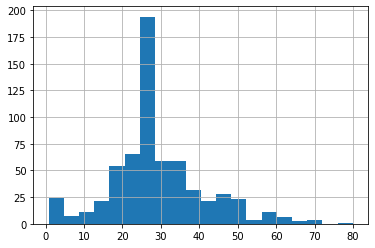

In [ ]:
dftrain['age'].hist(bins=20)

Text(0, 0.5, 'Number of Male and female')

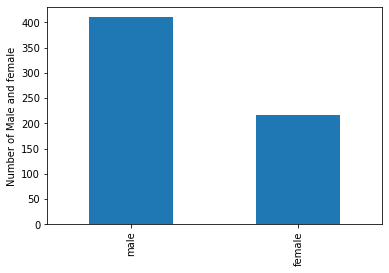

In [ ]:
dftrain['sex'].value_counts().plot(kind='bar').set_ylabel("Number of Male and female")

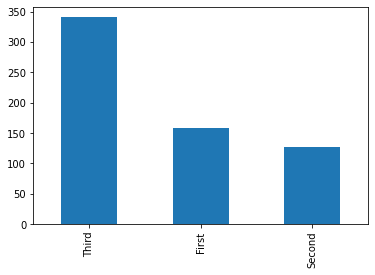

In [ ]:
dftrain['class'].value_counts().plot(kind='bar')

To check percentage of survival between male and female

Text(0.5, 0, 'Percentage of Survival')

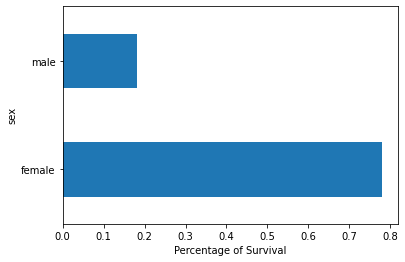

In [ ]:
pd.concat([dftrain, y_train], axis=1).groupby('sex').survived.mean().plot(kind='barh').set_xlabel('Percentage of Survival')


In [ ]:
dfeval.shape

(264, 9)

Testing:
Divide the data into Categorical and numerical columns
Create Feature columns which is the data we feed in 

In [ ]:
list(dftrain)

['sex',
 'age',
 'n_siblings_spouses',
 'parch',
 'fare',
 'class',
 'deck',
 'embark_town',
 'alone']

In [ ]:
CATEGORICAL_COLUMNS = ['sex',
 'n_siblings_spouses',
 'parch',
 'class',
 'deck',
 'embark_town',
 'alone']

In [ ]:
NUMERICAL_COLUMNS = ['age', 'fare']

In [ ]:
feature_columns = []
#iterate through each. Map int values
for feature_name in CATEGORICAL_COLUMNS:
  vocabulary = dftrain[feature_name].unique() # all unique vals
  feature_columns.append(tf.feature_column.categorical_column_with_vocabulary_list(feature_name, vocabulary))

for feature_name in NUMERICAL_COLUMNS:
  feature_columns.append(tf.feature_column.numeric_column(feature_name, dtype=tf.float32))

print(feature_columns)

[VocabularyListCategoricalColumn(key='sex', vocabulary_list=('male', 'female'), dtype=tf.string, default_value=-1, num_oov_buckets=0), VocabularyListCategoricalColumn(key='n_siblings_spouses', vocabulary_list=(1, 0, 3, 4, 2, 5, 8), dtype=tf.int64, default_value=-1, num_oov_buckets=0), VocabularyListCategoricalColumn(key='parch', vocabulary_list=(0, 1, 2, 5, 3, 4), dtype=tf.int64, default_value=-1, num_oov_buckets=0), VocabularyListCategoricalColumn(key='class', vocabulary_list=('Third', 'First', 'Second'), dtype=tf.string, default_value=-1, num_oov_buckets=0), VocabularyListCategoricalColumn(key='deck', vocabulary_list=('unknown', 'C', 'G', 'A', 'B', 'D', 'F', 'E'), dtype=tf.string, default_value=-1, num_oov_buckets=0), VocabularyListCategoricalColumn(key='embark_town', vocabulary_list=('Southampton', 'Cherbourg', 'Queenstown', 'unknown'), dtype=tf.string, default_value=-1, num_oov_buckets=0), VocabularyListCategoricalColumn(key='alone', vocabulary_list=('n', 'y'), dtype=tf.string, def

Vocabulary list is the encoded vals

TRAINING PROCESS. HOW TO FEED DATA

1.Send data in batches - epochs

In [ ]:
print("Input function that is used to train or evaluate")
#tf.data.Dataset is req

def make_input_fn(data_df, label_df, num_epochs=10, shuffle=True, batch_size=32):
  def input_function():  # inner function, this will be returned
    ds = tf.data.Dataset.from_tensor_slices((dict(data_df), label_df))  # create DATASET tf.data.Dataset object with data and its label
    if shuffle:
      ds = ds.shuffle(1000)  # randomize order of data
    ds = ds.batch(batch_size).repeat(num_epochs)  # split dataset into batches of 32 and repeat process for number of epochs
    return ds  # return a batch of the dataset
  return input_function  # return a function object for use

train_input_fn = make_input_fn(dftrain, y_train)  # here we will call the input_function that was returned to us to get a dataset object we can feed to the model
eval_input_fn = make_input_fn(dfeval, y_eval, num_epochs=1, shuffle=False)

   

Input function that is used to train or evaluate


Finally Creating model

In [ ]:
#feed in feature column
linear_est = tf.estimator.LinearClassifier(feature_columns=feature_columns) 

In [ ]:
linear_est.train(train_input_fn)  # train
result = linear_est.evaluate(eval_input_fn)  # get result

clear_output()
print(result['accuracy']*100)

74.62121248245239


In [ ]:
print(result)

{'accuracy': 0.7462121, 'accuracy_baseline': 0.625, 'auc': 0.82868075, 'auc_precision_recall': 0.7937511, 'average_loss': 0.5000433, 'label/mean': 0.375, 'loss': 0.49507555, 'precision': 0.63559324, 'prediction/mean': 0.4541761, 'recall': 0.75757575, 'global_step': 200}


The accuracy keeps changing because of the shuffling

In [ ]:
result = list(linear_est.predict(eval_input_fn))
result[0]

{'logits': array([-2.0224693], dtype=float32),
 'logistic': array([0.11686391], dtype=float32),
 'probabilities': array([0.88313603, 0.11686389], dtype=float32),
 'class_ids': array([0]),
 'classes': array([b'0'], dtype=object),
 'all_class_ids': array([0, 1], dtype=int32),
 'all_classes': array([b'0', b'1'], dtype=object)}

In [ ]:

pn = result[0]['probabilities'][1] #will not survive
print(dfeval.loc[0])
print(f"Percentage of surviving is {pn}")
print("Did he/she survive?")
print(y_eval.loc[0])

sex                          male
age                          35.0
n_siblings_spouses              0
parch                           0
fare                         8.05
class                       Third
deck                      unknown
embark_town           Southampton
alone                           y
Name: 0, dtype: object
Percentage of surviving is 0.11686389148235321
Did he/she survive?
0


What we just did is a numeric prediction.
Next up we predict the classes using classification process. This uses Logistic Regression. Since the label belongs to a particular class.

New Dataset for flowers


In [ ]:
from __future__ import absolute_import, division, print_function, unicode_literals


import tensorflow as tf

import pandas as pd

In [ ]:
CSV_COLUMN_NAMES = ['SepalLength', 'SepalWidth', 'PetalLength', 'PetalWidth', 'Species']
SPECIES = ['Setosa', 'Versicolor', 'Virginica']

In [ ]:
train_path = tf.keras.utils.get_file(
    "iris_training.csv", "https://storage.googleapis.com/download.tensorflow.org/data/iris_training.csv")
test_path = tf.keras.utils.get_file(
    "iris_test.csv", "https://storage.googleapis.com/download.tensorflow.org/data/iris_test.csv")

train = pd.read_csv(train_path, names=CSV_COLUMN_NAMES, header=0)
test = pd.read_csv(test_path, names=CSV_COLUMN_NAMES, header=0)

573/573 [==============================] - 0s 0us/step


In [ ]:
train.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
0,6.4,2.8,5.6,2.2,2
1,5.0,2.3,3.3,1.0,1
2,4.9,2.5,4.5,1.7,2
3,4.9,3.1,1.5,0.1,0
4,5.7,3.8,1.7,0.3,0


Species are already encoded here

In [ ]:
train_y = train.pop('Species')
test_y = test.pop('Species')
train.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth
0,6.4,2.8,5.6,2.2
1,5.0,2.3,3.3,1.0
2,4.9,2.5,4.5,1.7
3,4.9,3.1,1.5,0.1
4,5.7,3.8,1.7,0.3


In [ ]:
train.shape

(120, 4)

Input fn

In [ ]:
def input_fn(features, labels, training=True, batch_size=256):
    # Convert the inputs to a Dataset.
    dataset = tf.data.Dataset.from_tensor_slices((dict(features), labels))

    # Shuffle and repeat if you are in training mode.
    if training:
        dataset = dataset.shuffle(1000).repeat()
    
    return dataset.batch(batch_size)

In [ ]:
my_feature_columns = []
for key in train.keys():
    my_feature_columns.append(tf.feature_column.numeric_column(key=key))
print(my_feature_columns)

[NumericColumn(key='SepalLength', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None), NumericColumn(key='SepalWidth', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None), NumericColumn(key='PetalLength', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None), NumericColumn(key='PetalWidth', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None)]


Since this is a classification model.
DNN or LinearClassifier

In [ ]:
classifier = tf.estimator.DNNClassifier(
    feature_columns=my_feature_columns,
    # Two hidden layers of 30 and 10 nodes respectively.
    hidden_units=[30, 10],
    # The model must choose between 3 classes.
    n_classes=3)

In [ ]:
classifier.train(
    #lambda is a one line function
    input_fn=lambda: input_fn(train, train_y, training=True),
    steps=5000) #steps instead of epochs
# We include a lambda to avoid creating an inner function previously

In [ ]:
classifier.evaluate(input_fn=lambda: input_fn(test, test_y, training=False))

{'accuracy': 0.53333336,
 'average_loss': 0.6622735,
 'loss': 0.6622735,
 'global_step': 5000}

Script for any flower detail

In [ ]:
def input_fn(features, batch_size=256):
    # Convert the inputs to a Dataset without labels.
    return tf.data.Dataset.from_tensor_slices(dict(features)).batch(batch_size)

features = ['SepalLength', 'SepalWidth', 'PetalLength', 'PetalWidth']
predict = {}

print("Please type numeric values as prompted.")
for feature in features:
  valid = True
  while valid: 
    val = input(feature + ": ")
    if not val.isdigit(): valid = False

  predict[feature] = [float(val)]

predictions = classifier.predict(input_fn=lambda: input_fn(predict))
for pred_dict in predictions:
    class_id = pred_dict['class_ids'][0]
    probability = pred_dict['probabilities'][class_id]

    print('Prediction is "{}" ({:.1f}%)'.format(
        SPECIES[class_id], 100 * probability))


Please type numeric values as prompted.
SepalLength: 5.2
SepalWidth: 6.3
PetalLength: 2.6
PetalWidth: 5.8
Prediction is "Setosa" (79.3%)


Clustering

points closest to centroid and move centroid to COM position


Assign points to the clusters

Hidden Markov Model uses probabilistic method. So it uses probability distribution.

Example is weather prediction. We use states in this model. Transition Probabilty between states and the observation probabilties

In [ ]:
import tensorflow_probability as tfp

Weather Model

In [ ]:
tfd = tfp.distributions
#first day condition
initial_distribution = tfd.Categorical(probs=[0.8, 0.2]) #cold P and hot P
transition_distribution = tfd.Categorical(probs=[[0.7, 0.3], [0.6, 0.4]])  # refer to points 3 and 4 above
observation_distribution = tfd.Normal(loc=[0., 15.], scale=[5., 10.]) #Normally distributed observations with mean and std dev

In [ ]:
#Create Model

model = tfd.HiddenMarkovModel(initial_distribution=initial_distribution, transition_distribution=transition_distribution, observation_distribution=observation_distribution, num_steps=7)

In [ ]:
mean = model.mean()
#this is in partial tensor form. So we must convert to get the actual values in terms of numpy. Session
with tf.compat.v1.Session() as sess:  
  print(mean.numpy())

#first day, second, third ....

[3.        4.7999997 4.98      4.998     4.9997993 4.9999795 4.9999976]


Neural Network : Input and Output neurons. Used for predicting class. Each neuron prediction addes up to 1. So similar to probability distribution.

Layered Approach. Hidden layer. Layers are connected through weights!! So that is graph!!!

Dense NN means when every node is connected to parent node.

Bias: It is like an extra node that we add and connect it to the hidden neuros layer. This is not fed with input. We send constant values to the hidden layer so that we can perform fucntions. The weight is typically 1 when bias is connected to any other node

Activation functions: for classification purposes. Output based on functions. Rectified Linear Unit, TanH and Sigmoid.

N1 = F(Sigma Wi.Xi + bias)

Loss Function : Says how far away we are from the expected value of the NN.

Functions are: Mean squared error, Mean absolute error and Hinge loss

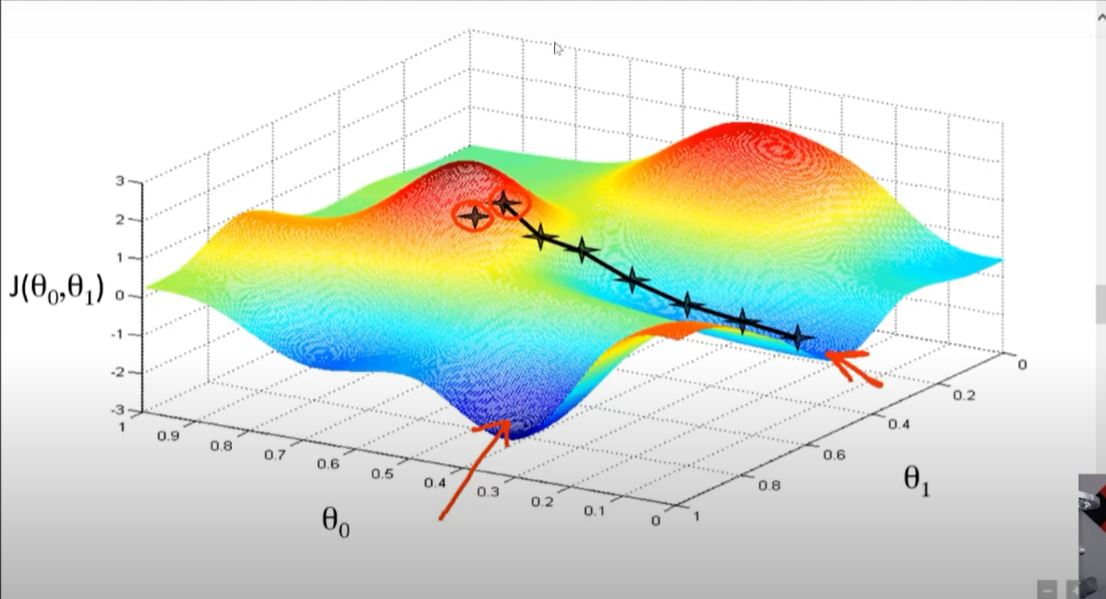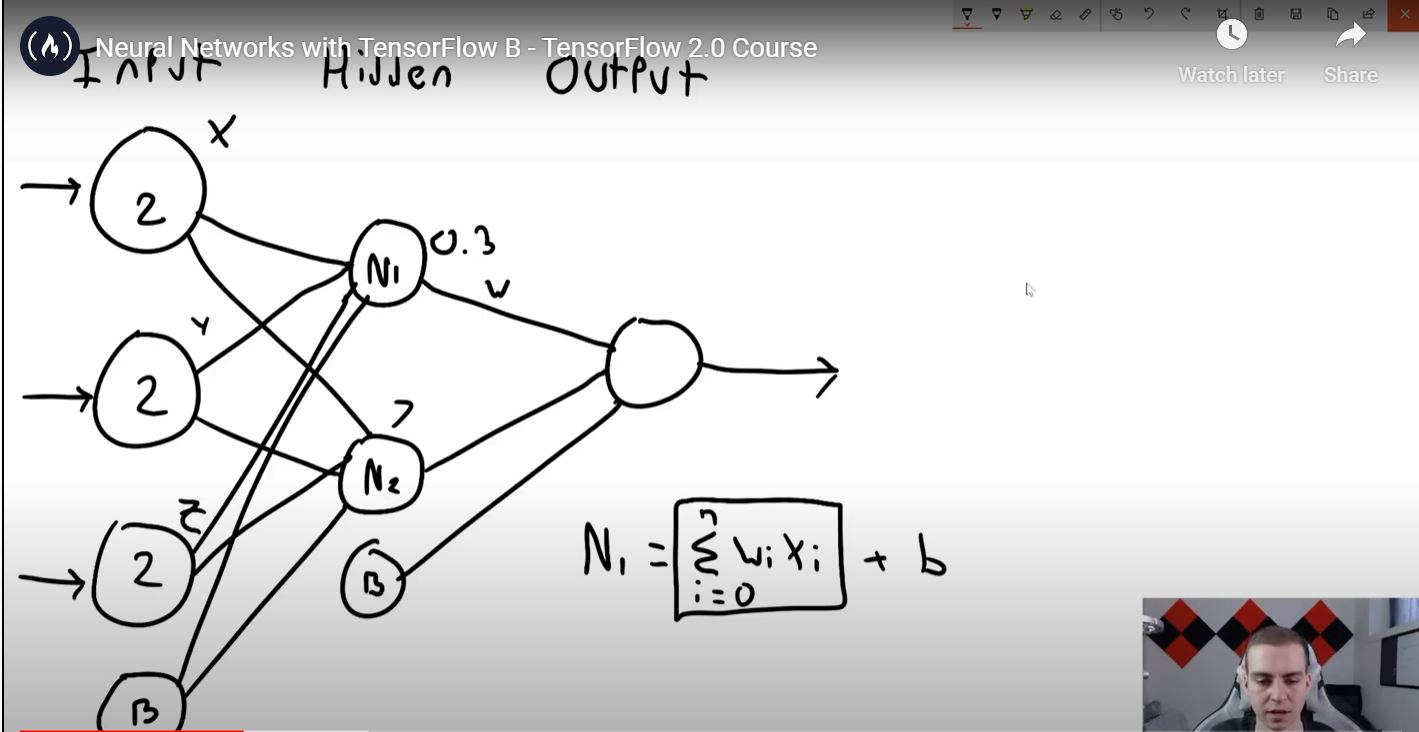

Optimizer functions help us perform the gradient descent.


*   Gradient Descent
*   Stochastic Gradient Descent (SGD)
*   Mini Batch Stochastic Gradient Descent (MB-SGD)
*   SGD with momentum
*   Nesterov Accelerated Gradient (NAG)
*   Adaptive Gradient (AdaGrad)







In [ ]:
 import tensorflow as tf
 from tensorflow import keras
 import pandas as pd
 import numpy as np
 import matplotlib.pyplot as plt

Fashion Dataset. 60000 images for train and 10000 for testing

In [ ]:
fashion_mnist=keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [ ]:
train_images.shape
type(train_images)

numpy.ndarray

In [ ]:
train_images[0, 23, 23]

194

So 255 being white and 0 being black. So these are grayscale Images

In [ ]:
print(train_images)

[[[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 ...

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]]


In [ ]:
train_labels[:10]

array([9, 0, 0, 3, 0, 2, 7, 2, 5, 5], dtype=uint8)

So these are from 0 to 9. This means there are 10 different classes for the outputs

In [ ]:
class_names = ['T-shirt/top',
'Trouser',
'Pullover',
'Dress',
'Coat',
'Sandal',
'Shirt',
'Sneaker',
'Bag',
'Ankle boot']

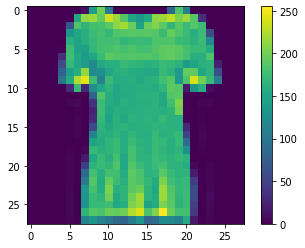

In [ ]:
plt.figure()
plt.imshow(train_images[10])
plt.colorbar()
plt.show()

Now Data Processing. Make the number you feed in to the NN as small as possible. So here we divide the gray scale numbers of the images by 255. So either 0 or 1

In [ ]:
train_images = train_images/255.0
test_images = test_images/255.0

In [ ]:
print(train_images[1])

[[0.         0.         0.         0.         0.         0.00392157
  0.         0.         0.         0.         0.16078431 0.7372549
  0.40392157 0.21176471 0.18823529 0.16862745 0.34117647 0.65882353
  0.52156863 0.0627451  0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.00392157 0.         0.
  0.         0.19215686 0.53333333 0.85882353 0.84705882 0.89411765
  0.9254902  1.         1.         1.         1.         0.85098039
  0.84313725 0.99607843 0.90588235 0.62745098 0.17647059 0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.05490196
  0.69019608 0.87058824 0.87843137 0.83137255 0.79607843 0.77647059
  0.76862745 0.78431373 0.84313725 0.8        0.79215686 0.78823529
  0.78823529 0.78823529 0.81960784 0.85490196 0.87843137 0.64313725
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.7372549
 

Build Model: Keras Sequential Model. Feed forward NN.

In [ ]:
model = keras.Sequential(
    [
        keras.layers.Flatten(input_shape=(28,28)),# 28x28 matrix is flattened
        keras.layers.Dense(128, activation="relu"),
        keras.layers.Dense(10, activation="softmax")#10 classes so 10 neurons. Softmax is for like probability Distribution function. So values will add up to 1!
        #Input, hidden and output layer respectively
    ]
)

As of now e have defined the architechture of the model. So now compiling which is the gradient descent part

In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
model.fit(train_images, train_labels, epochs=2)

Epoch 1/2
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1834 - accuracy: 0.9319
Epoch 2/2
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1779 - accuracy: 0.9317


Now evaluate using test data

In [ ]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=1)
print('Test accuracy: ', test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.3590 - accuracy: 0.8873
Test accuracy:  0.8873000144958496


So Now the accuracy is less than the previous step. THIS IS CALLED OVER-FITTING. This is because we sent a lot of data in train. So the model is used to that data and hence shows a higher accuracy. But it must show higher accuracy for new data that is fed to the model.

---



In [ ]:
predictions = model.predict(test_images)

313/313 [==============================] - 1s 4ms/step


In [ ]:
print(predictions)

[[2.2832412e-08 1.5634962e-08 1.6502056e-09 ... 4.2407196e-03
  1.5218299e-10 9.9519783e-01]
 [1.2431851e-04 2.1780350e-13 9.9941146e-01 ... 2.4093036e-19
  2.5922946e-16 2.5910562e-18]
 [7.3949805e-14 9.9999994e-01 2.1024160e-16 ... 1.0507036e-25
  1.7873397e-19 2.8182811e-26]
 ...
 [1.6257953e-09 1.2049376e-15 3.3461591e-11 ... 1.5665558e-14
  9.9999970e-01 1.2840727e-17]
 [6.3282787e-14 9.9999994e-01 1.7317200e-13 ... 8.5188664e-17
  3.4212069e-12 1.0404022e-16]
 [7.9299474e-07 2.1428875e-10 1.5321137e-09 ... 4.7931603e-06
  7.3252480e-08 9.6618562e-09]]


In [ ]:
print(predictions[0])

[2.2832412e-08 1.5634962e-08 1.6502056e-09 5.9193678e-14 6.0377708e-08
 5.6132046e-04 7.2486799e-09 4.2407196e-03 1.5218299e-10 9.9519783e-01]


In [ ]:
print(class_names[np.argmax(predictions[0])])

#returns index of max value

9


So according to the prediction, it is 9th class which is Ankle Boot. Let us check


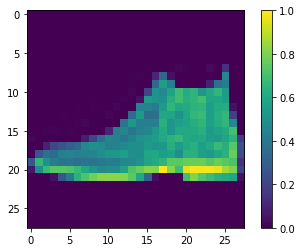

In [ ]:
plt.figure()
plt.imshow(test_images[0])
plt.colorbar()
plt.show()

So prediction was CORRECT!

Pick a number: 1
1/1 [==============================] - 0s 24ms/step


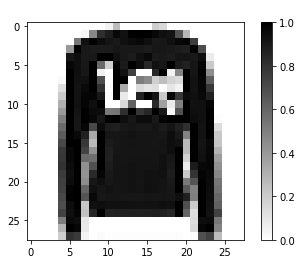

In [ ]:
COLOR = 'white'
plt.rcParams['text.color'] = COLOR
plt.rcParams['axes.labelcolor'] = COLOR

def predict(model, image, correct_label):
  class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
  prediction = model.predict(np.array([image]))
  predicted_class = class_names[np.argmax(prediction)]

  show_image(image, class_names[correct_label], predicted_class)


def show_image(img, label, guess):
  plt.figure()
  plt.imshow(img, cmap=plt.cm.binary)
  plt.title("Excpected: " + label)
  plt.xlabel("Guess: " + guess)
  plt.colorbar()
  plt.grid(False)
  plt.show()


def get_number():
  while True:
    num = input("Pick a number: ")
    if num.isdigit():
      num = int(num)
      if 0 <= num <= 1000:
        return int(num)
    else:
      print("Try again...")

num = get_number()
image = test_images[num]
label = test_labels[num]
predict(model, image, label)
